## Análisis de Datos y Modelos de Aprendizaje Automático

Primero, importamos las librerías necesarias y cargamos los datos.

Ahora, preparamos los datos para el entrenamiento, seleccionando las características 'area' y 'perimeter' y la etiqueta 'Figura'.

A continuación, entrenamos los modelos de Random Forest y Support Vector Machine (SVM).

Finalmente, evaluamos los modelos utilizando curvas ROC y matrices de confusión para cada uno.

In [1]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, roc_curve, auc, RocCurveDisplay
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt
import numpy as np

# Cargando el archivo CSV
# Asegúrate de tener el archivo CSV en el mismo directorio que este notebook
pd.set_option('display.max_rows', None)

# Cargando el archivo CSV

#data = pd.read_csv('./shapes_data.csv')
data = pd.read_csv('./shapes_matrix.csv')
data
    

,Figura,area,perimeter,centroid,orientation,bbox,convex_area,convex_image,coords,eccentricity,equivalent_diameter,euler_number,extent,filled_area,filled_image,major_axis_length,minor_axis_length,orientation.1,solidity
0,Triángulo,11096.0,534.847763,"(260.2135003604903, 489.3092105263158)",0.393247,"(193, 411, 383, 530)",11297.0,[[False False False ... True False False]\n [...,[[193 527]\n [194 517]\n [194 518]\n ...\n [38...,0.867600,118.860700,1,0.490756,11096.0,11096.0,185.374733,92.179927,0.393247,0.982208
1,Triángulo,1.0,0.000000,"(458.0, 252.0)",0.785398,"(458, 252, 459, 253)",1.0,[[ True]],[[458 252]],0.000000,1.128379,1,1.000000,1.0,1.0,0.000000,0.000000,0.785398,1.000000
2,Triángulo,1.0,0.000000,"(377.0, 794.0)",0.785398,"(377, 794, 378, 795)",1.0,[[ True]],[[377 794]],0.000000,1.128379,1,1.000000,1.0,1.0,0.000000,0.000000,0.785398,1.000000
3,Triángulo,88118.0,1494.314934,"(427.3245307428675, 379.6490501373159)",-0.898169,"(193, 110, 641, 586)",88744.0,[[False False False ... False False True]\n [...,[[193 585]\n [194 584]\n [195 582]\n ...\n [63...,0.739533,334.955702,1,0.413218,88118.0,88118.0,448.952835,302.199213,-0.898169,0.992946
4,Triángulo,1.0,0.000000,"(9.0, 73.0)",0.785398,"(9, 73, 10, 74)",1.0,[[ True]],[[ 9 73]],0.000000,1.128379,1,1.000000,1.0,1.0,0.000000,0.000000,0.785398,1.000000
5,Triángulo,44431.0,1485.618362,"(486.9999549863834, 363.492944115595)",1.487005,"(400, 98, 533, 784)",45058.0,[[False False False ... False False False]\n [...,[[400 205]\n [401 205]\n [401 206]\n ...\n [53...,0.982744,237.847233,1,0.486979,44431.0,44431.0,608.143380,112.488647,1.487005,0.986085
6,Triángulo,150118.0,2055.720959,"(547.9901877189944, 529.6245420269388)",-1.286681,"(289, 32, 691, 782)",151060.0,[[False False False ... False False False]\n [...,[[289 776]\n [290 775]\n [290 776]\n ...\n [68...,0.899581,437.191233,1,0.497904,150118.0,150118.0,727.457915,317.720231,-1.286681,0.993764
7,Triángulo,10838.0,672.677236,"(510.6435689241558, 249.68804207418344)",0.326785,"(352, 209, 646, 323)",11130.0,[[False False False ... False False False]\n [...,[[352 218]\n [353 218]\n [354 218]\n ...\n [64...,0.966291,117.470721,1,0.323368,10838.0,10838.0,254.633996,65.555989,0.326785,0.973765
8,Triángulo,1.0,0.000000,"(64.0, 614.0)",0.785398,"(64, 614, 65, 615)",1.0,[[ True]],[[ 64 614]],0.000000,1.128379,1,1.000000,1.0,1.0,0.000000,0.000000,0.785398,1.000000
9,Triángulo,69426.0,1387.757539,"(269.03811252268605, 299.9843574453375)",-0.172237,"(21, 141, 568, 438)",70021.0,[[False False False ... False False True]\n [...,[[ 21 437]\n [ 22 436]\n [ 23 435]\n ...\n [56...,0.858242,297.314528,1,0.427345,69426.0,69426.0,456.369269,234.229669,-0.172237,0.991503


In [5]:

# Preparando los datos
X = data[['area', 'perimeter']]  # Características
y = data['Figura']               # Etiquetas

# Codificación de las etiquetas
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Dividiendo los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)
    

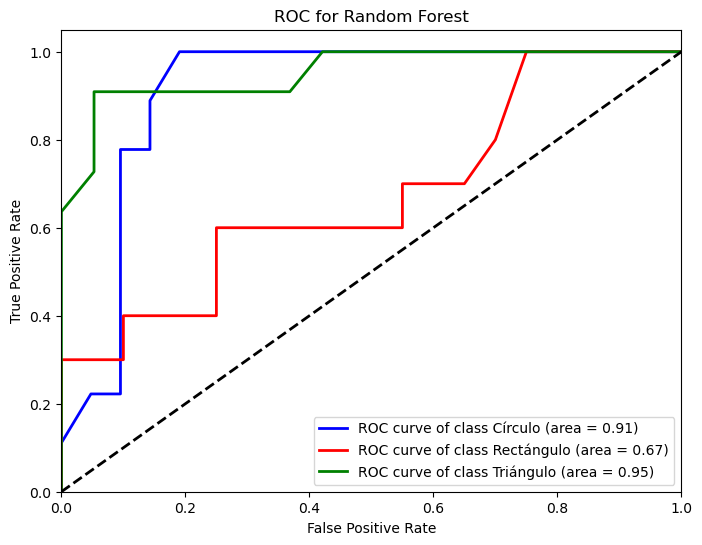

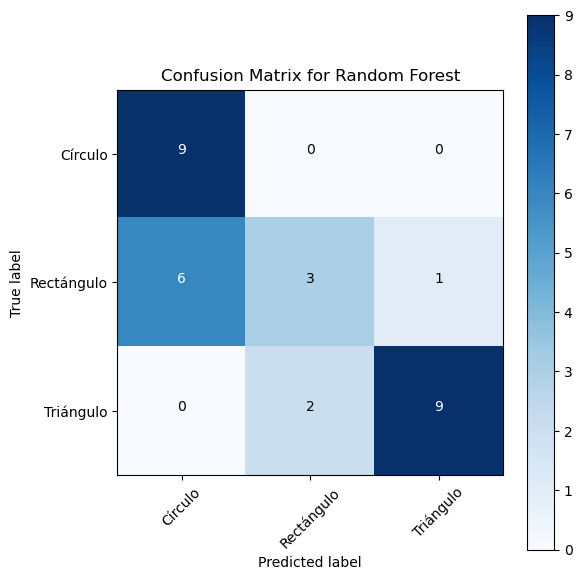

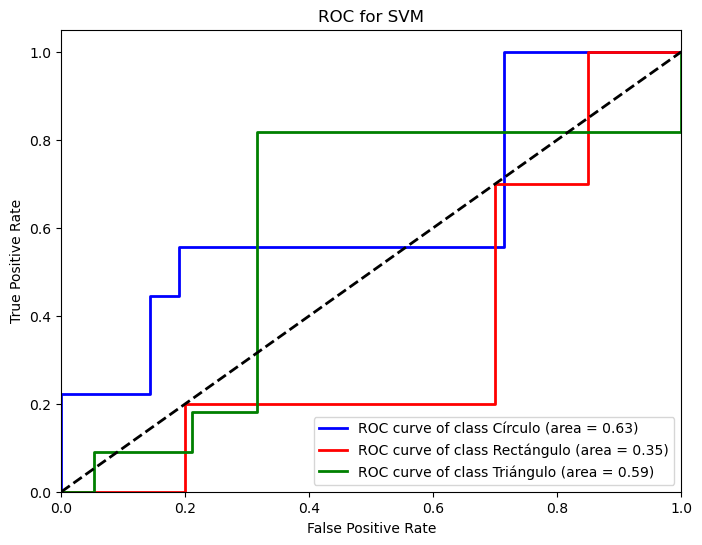

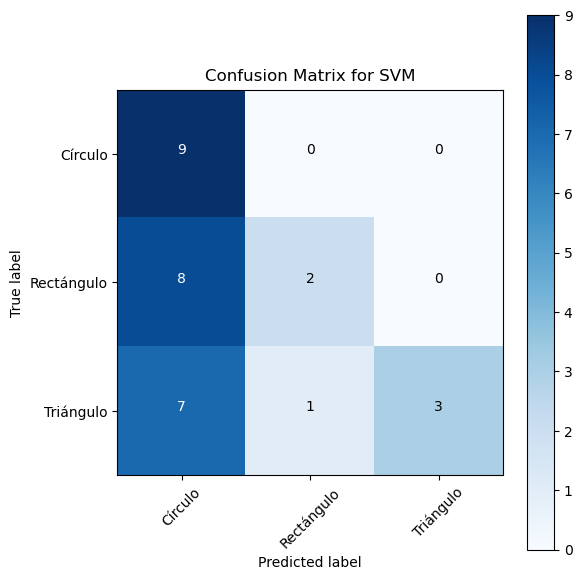

In [6]:

# Entrenando los modelos
# Modelo 1: Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Modelo 2: Support Vector Machine (SVM)
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# Función para calcular y mostrar la curva ROC y la matriz de confusión
def evaluate_model(model, X_test, y_test, model_name):
    # Predicciones y probabilidades
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)

    # Curva ROC para cada clase
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    n_classes = len(label_encoder.classes_)
    y_test_bin = label_binarize(y_test, classes=range(n_classes))

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Dibujando la curva ROC para cada clase
    plt.figure(figsize=(8, 6))
    colors = ['blue', 'red', 'green']
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label=f'ROC curve of class {label_encoder.classes_[i]} (area = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC for {model_name}')
    plt.legend(loc="lower right")
    plt.show()

    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.colorbar()
    ticks = np.arange(len(label_encoder.classes_))
    plt.xticks(ticks, label_encoder.classes_, rotation=45)
    plt.yticks(ticks, label_encoder.classes_)

    # Etiquetas de números en las celdas
    thresh = cm.max() / 2.
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, cm[i, j], horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Evaluando los modelos
evaluate_model(rf_model, X_test, y_test, "Random Forest")
evaluate_model(svm_model, X_test, y_test, "SVM")
    